## Lending Club Case Study

### Problem Statement

A consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:
    
><font color = blue>***1.If the applicant is likely to repay the loan, then not approving the
    loan results in a loss of business to the company.***</font>
    
><font color = blue>***2.If the applicant is not likely to repay the loan, i.e. he/she is likely
    to default, then approving the loan may lead to a financial loss for
    the company.***</font>

### Business Objective
To identify variables which are strong indicators of default and potentially use the insights in approval /
rejection decision making.

 # Import Libraries and set required parameters

In [1]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('seaborn version\t:',sns.__version__)
import seaborn as sb
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

numpy version	: 1.21.5
pandas version	: 1.4.2
seaborn version	: 0.11.2


# Data Sourcing

In [2]:
loan=pd.read_csv(r"F:\Python\ML\loan.csv")
print(loan.shape)


(39717, 111)


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning and Manipulation
#removeNulls(dataframe, axis, percent) will drop the columns/rows from the dataset based on the parameter values.

In [5]:
#Number of columns having null value more than 40% 
def missing_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output


NA_col = missing_percentage(loan)
NA_col_40 = NA_col[NA_col>40]

print("Number of columns having null value more than 40% :", len(NA_col_40.index))
print(NA_col_40)


Number of columns having null value more than 40% : 57
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
in

In [6]:
#1. Remove columns where NA values are more than or equal to 40
# Since the columns having more missing values will not impact our analysis.
loan = loan.drop(NA_col_40.index, axis =1)
loan.shape

(39717, 54)

In [7]:
#Remove columns where number of unique value is only 1.
#By removing all columns where number of unique value is only 1 because that will not impact our analysis.
unique = loan.nunique()
unique = unique[unique.values == 1]

In [8]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print(loan.shape)

loan.head()

(39717, 45)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [9]:
#Removing of other columns:
   
#Columns which will not add any useful information for our analysis we should remove them

loan.drop(['member_id', 'id','zip_code','url'], axis=1, inplace=True)
loan.shape

(39717, 41)

In [10]:
# Check if there are any duplicate values in the dataset
loan[loan.duplicated(keep=False)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


The dataset does not contain any duplicate rows.

In [11]:
#Dropping of sub_grade column as grade is present.
loan.drop(['sub_grade'], axis=1, inplace=True)
loan.shape

(39717, 40)

In [12]:
#Dropping of'desc'column as contains the comments of the applicant while applying for the loan.It will not impact our analysis.
loan.drop(['desc'], axis=1, inplace=True)
loan.shape

(39717, 39)

The customer behaviour variables(those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.) are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.





In [13]:
behaviour_var =  [
  'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [14]:
# let's now remove the behaviour variables from analysis
loan = loan.drop(behaviour_var, axis=1)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0.0


In [15]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
loan['title']

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

In [17]:
loan['purpose']

0               credit_card
1                       car
2            small_business
3                     other
4                     other
                ...        
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39715                 other
39716    debt_consolidation
Name: purpose, Length: 39717, dtype: object

In [18]:
#The variable 'title' is derived from the variable 'purpose'
#We can keep either of them.
# let's now remove the title variables from our analysis
loan.drop(['title'], axis=1, inplace=True)
loan.shape

(39717, 18)

In [19]:
# summarising the values
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, 
so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1.

In [20]:
# filtering only fully paid and charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# summarising the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [21]:
#Transform all continuos variables to numeric

numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

# Derived Metrics

In [22]:
#Loan amount to Annual Income ratio
loan['loan_inc_ratio']= loan['loan_amnt']/loan['annual_inc']

In [23]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_inc_ratio
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,AZ,27.65,0.0,0.208333
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,GA,1.00,0.0,0.083333
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,IL,8.72,0.0,0.195886
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,CA,20.00,0.0,0.203252
5,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,AZ,11.20,0.0,0.138889


In [24]:
#Create Bins for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [25]:
#Create Bins for range of Annual Income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [26]:
# Convert 'issue_d' column datatype to datetime
loan['issue_d'] = loan['issue_d'].apply(lambda row: datetime.strptime(row,'%b-%y'))

In [27]:
# Derive year column from 'issue_d' and drop it
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year
loan.drop('issue_d', axis=1, inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_inc_ratio,loan_amnt_range,annual_inc_range,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,...,0,credit_card,AZ,27.65,0.0,0.208333,0-5000,0-25000,12,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,...,1,car,GA,1.00,0.0,0.083333,0-5000,25000-50000,12,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,...,0,small_business,IL,8.72,0.0,0.195886,0-5000,0-25000,12,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,...,0,other,CA,20.00,0.0,0.203252,5000-10000,25000-50000,12,2011
5,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,...,0,wedding,AZ,11.20,0.0,0.138889,0-5000,25000-50000,12,2011


In [28]:
#change the type of int_rate column from string to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)

In [29]:
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [30]:
loan['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [31]:
# Filter a defaulter dataset for further analysis
loan_defaulted = loan[~(loan['loan_status'] == 0)]
loan_defaulted 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_inc_ratio,loan_amnt_range,annual_inc_range,issue_month,issue_year
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,...,1,car,GA,1.00,0.0,0.083333,0-5000,25000-50000,12,2011
8,5600,5600,5600.0,60 months,21.28,152.39,F,NaN,4 years,OWN,...,1,small_business,CA,5.55,0.0,0.140000,5000-10000,25000-50000,12,2011
9,5375,5375,5350.0,60 months,12.69,121.45,B,Starbucks,< 1 year,RENT,...,1,other,TX,18.08,0.0,0.358333,5000-10000,0-25000,12,2011
12,9000,9000,9000.0,36 months,13.49,305.38,C,Va. Dept of Conservation/Recreation,< 1 year,RENT,...,1,debt_consolidation,VA,10.08,0.0,0.300000,5000-10000,25000-50000,12,2011
14,10000,10000,10000.0,36 months,10.65,325.74,B,SFMTA,3 years,RENT,...,1,other,CA,7.06,0.0,0.100000,5000-10000,75000-100000,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,2500,675.0,36 months,12.80,84.00,D,Nebraska Occupational Therapy,< 1 year,MORTGAGE,...,1,home_improvement,NE,20.00,NaN,0.078125,0-5000,25000-50000,8,2007
39668,2500,2500,825.0,36 months,9.64,80.26,B,AMZ Marketing,< 1 year,MORTGAGE,...,1,home_improvement,NE,20.00,NaN,0.033333,0-5000,50000-75000,8,2007
39669,6500,6500,225.0,36 months,15.01,225.37,F,Universal Advertising,9 years,MORTGAGE,...,1,small_business,GA,6.45,NaN,0.030516,5000-10000,100000 and above,8,2007
39678,1000,1000,950.0,36 months,10.59,32.55,C,Invision Power Services,2 years,MORTGAGE,...,1,wedding,VA,14.47,NaN,0.029420,0-5000,25000-50000,8,2007


In [32]:
#First, let's look at the overall default rate
round(np.mean(loan['loan_status']), 2)

0.15

The overall default rate is about 15%.

# Univariate Analysis

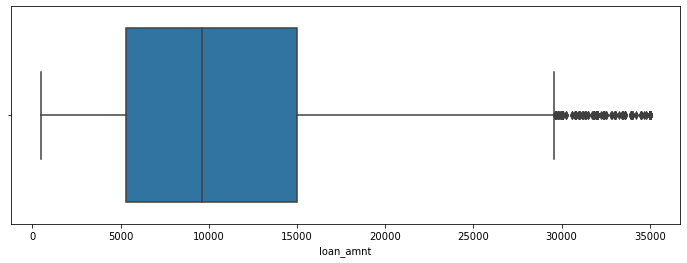

In [33]:
plt.figure(figsize=(12, 4))
sns.boxplot(loan['loan_amnt'])
plt.show()

    # Observation: Most of the loan amounts are distributed between 5000 to 15000. It is having outlier.

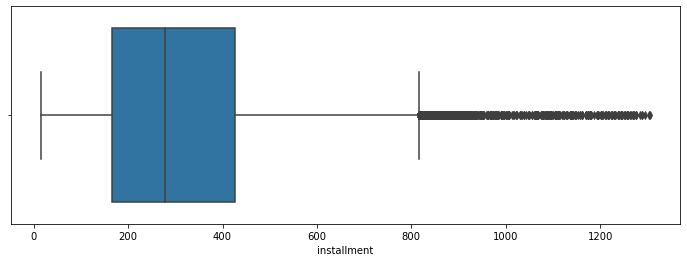

In [34]:
plt.figure(figsize=(12, 4))
sns.boxplot(loan['installment'])
plt.show()

    # Observation: The instalment ranges around 200 to more than 400 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

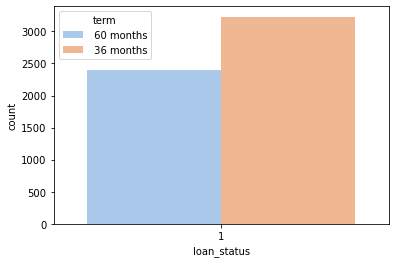

In [35]:
# Categorical Variables
sns.countplot(x="loan_status", data=loan_defaulted, hue='term',palette='pastel', linewidth=5)


    # Observation: 14% of loan applied are charged Off of which 73% of loan applied are having term of 36 months.

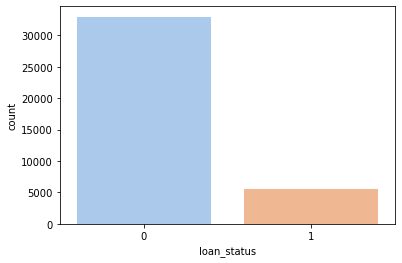

In [62]:
# Categorical Variables
sns.countplot(x="loan_status", data=loan, palette='pastel', linewidth=5)
plt.show()


14.6% loan applicants have defaulted.

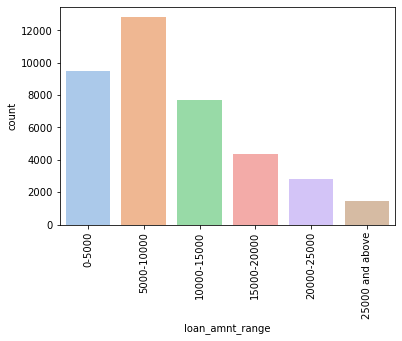

In [36]:
sns.countplot(x="loan_amnt_range", data=loan,palette='pastel', linewidth=5)
plt.xticks(rotation=90)
plt.show()

The loan amount range is more incase of 5000-10000 followed by 10000-15000.

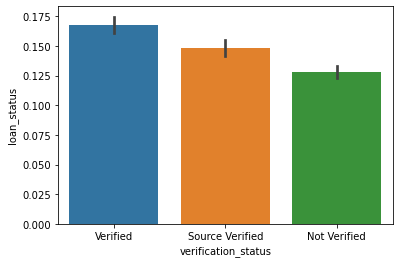

In [37]:
# plotting default rates across grade of the loan
sns.barplot(x='verification_status', y='loan_status', data= loan)
plt.show()

The verification status for verified is more compared to other two.

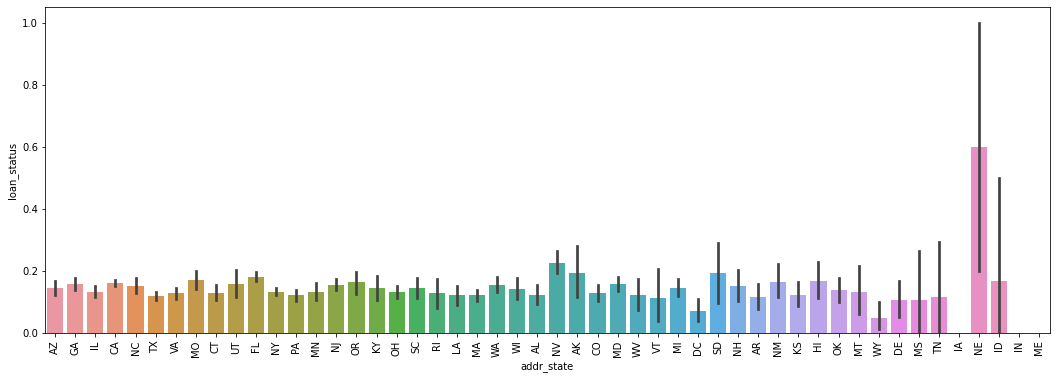

In [38]:

# plotting default rates across grade of the loan
plt.figure(figsize=(18, 6))
sns.barplot(x='addr_state', y='loan_status', data= loan)
plt.xticks(rotation=90)
plt.show()

The NE has hgh default rates compare to others.

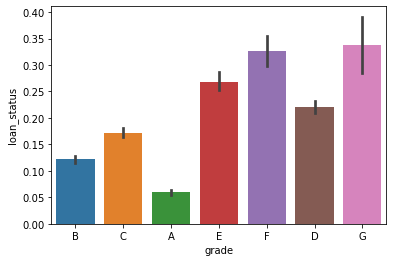

In [39]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data= loan)
plt.show()

   The grades G,F,E have high default rates.

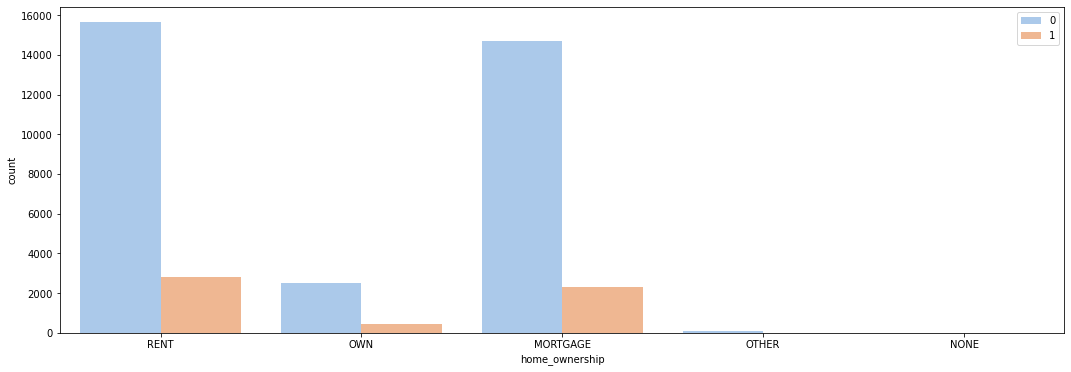

In [40]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="home_ownership", data=loan, hue='loan_status', palette='pastel', linewidth=5)
ax.legend(loc="upper right")

Observation: The majority of loan applicant are having home in rent `or mortgage

We can see clearly that from year 2007 to 2011 the loan applicants increases. 

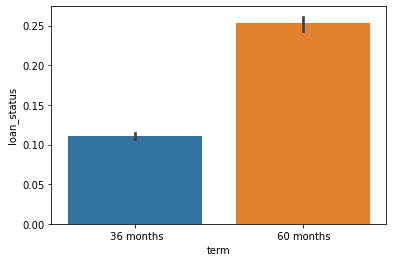

In [41]:
# plotting default rates across term of the loan
sns.barplot(x='term', y='loan_status', data= loan)
plt.show()

The term: 60 months loans default more than 36 months loans.

In [42]:
loan['issue_year'].value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

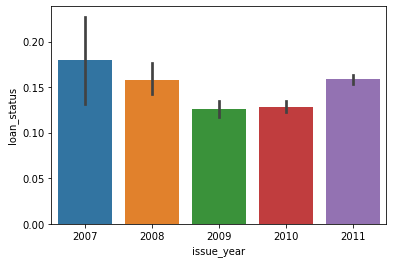

In [43]:
# plotting default rates across term of the loan
sns.barplot(x='issue_year', y='loan_status', data= loan)
plt.show()

The default rate is more in 2007 and 2011.

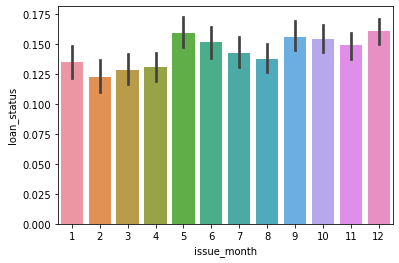

In [44]:
# plotting default rates across term of the loan
sns.barplot(x='issue_month', y='loan_status', data= loan)
plt.show()

# Bivariate Analysis

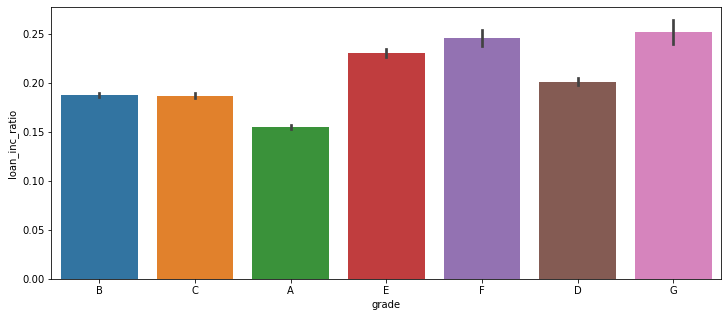

In [45]:

plt.figure(figsize=(12,5))
ax = sns.barplot(x="grade", y="loan_inc_ratio", data=loan)


The loan_inc_ratio is higher for G followed by F and E.

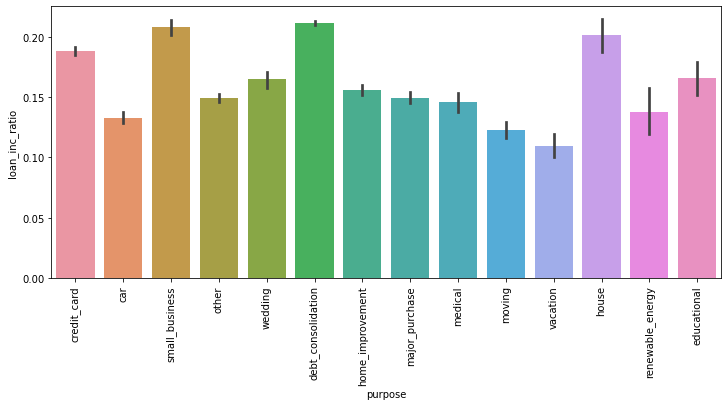

In [46]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="purpose", y="loan_inc_ratio", data=loan)
plt.xticks(rotation=90)
plt.show()

loan_inc_ratio is more for small_business,debt_consolidation,house,educational and credit_card compare to others.

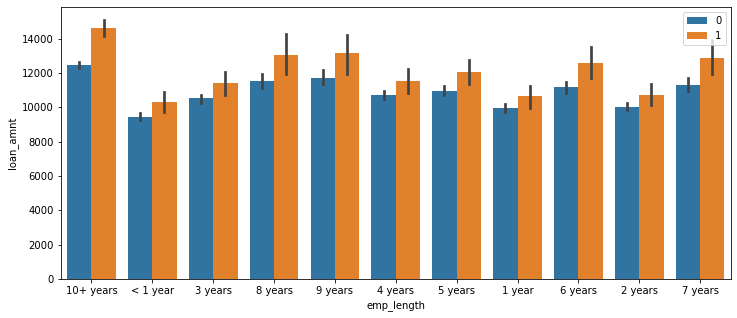

In [47]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="emp_length", y="loan_amnt",hue='loan_status',  data=loan)
ax.legend(loc="upper right")
plt.show()

Observation: Maximum loan with 10+ years of employment length.

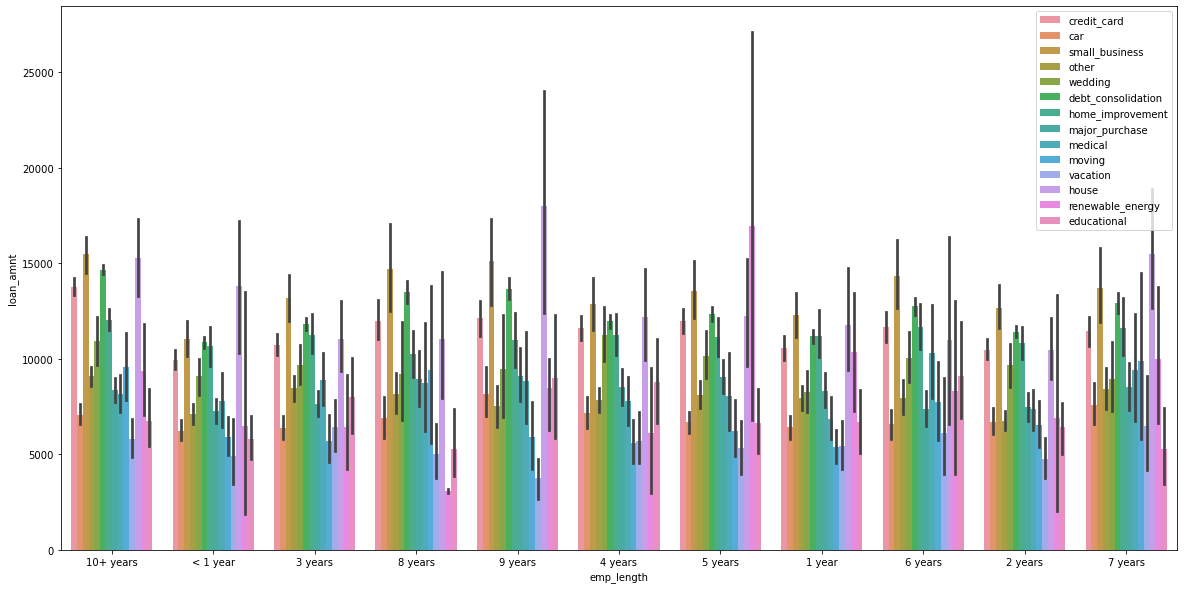

In [48]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="emp_length", y="loan_amnt",hue='purpose',  data=loan)
ax.legend(loc="upper right")
plt.show()

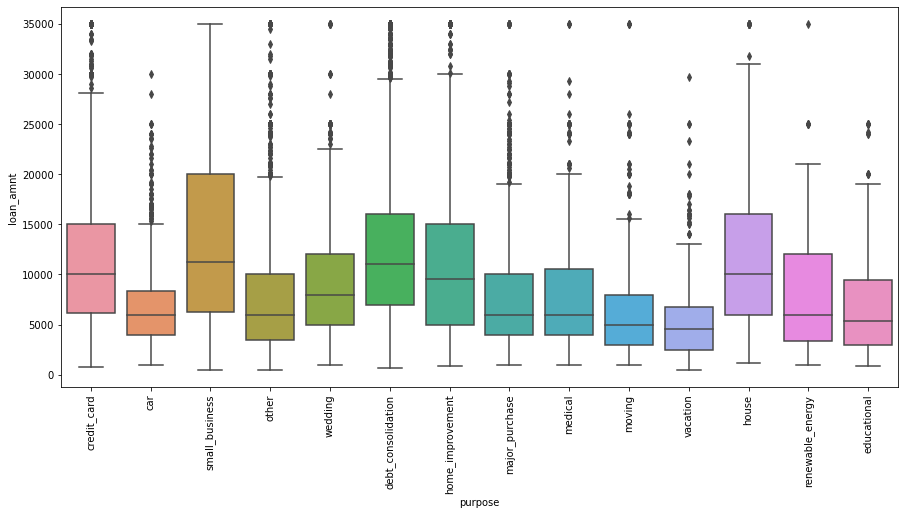

In [49]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'purpose', y = 'loan_amnt', data = loan)
plt.xticks(rotation=90)
plt.show()


Observation: The Small Business are taking the highest loan compared to others. 

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

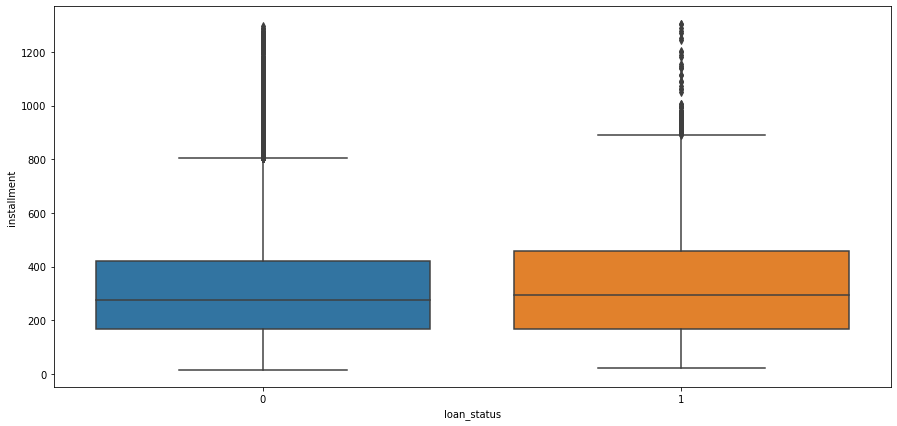

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'loan_status', y = 'installment', data = loan)


    # Observation: Loans with less instalments are having maximum charged off.

<AxesSubplot:xlabel='annual_inc_range', ylabel='int_rate'>

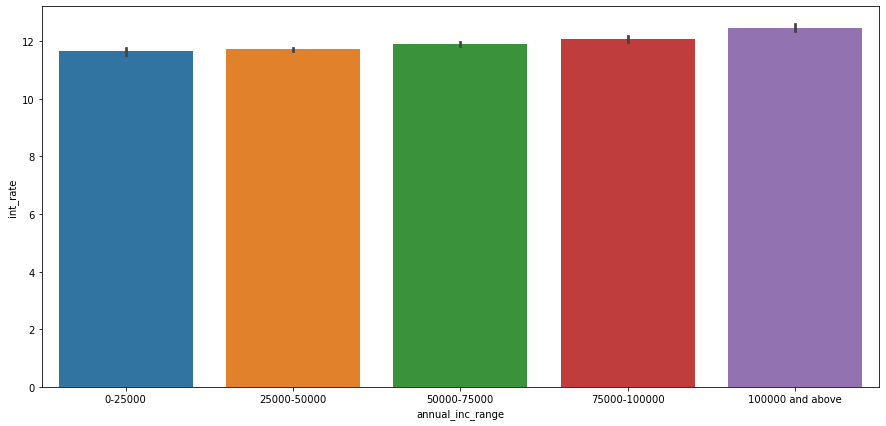

In [51]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'annual_inc_range', y = 'int_rate', data = loan)


The int_rate is gradually increasing for annual incomes.

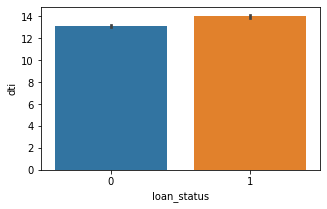

In [66]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'loan_status', y = 'dti', data = loan)
plt.show()


Observation: The loan with higher DTI are getting Charged Off more

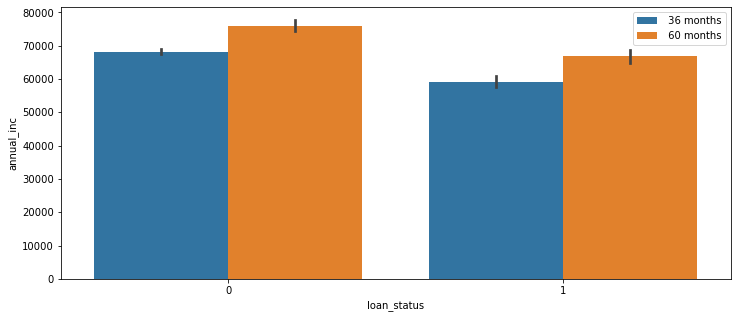

In [53]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="loan_status", y="annual_inc",hue='term',  data=loan)
ax.legend(loc="upper right")

Observation: The "fully paid" is increasing with increasing in annual income.

In [54]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'loan_inc_ratio',
       'loan_amnt_range', 'annual_inc_range', 'issue_month', 'issue_year'],
      dtype='object')

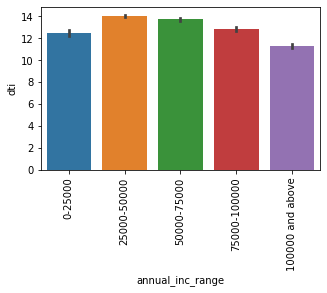

In [60]:
plt.figure(figsize=(5,3))
sns.barplot(x = 'annual_inc_range', y = 'dti', data = loan)
plt.xticks(rotation=90)
plt.show()


dti is higher for annual_inc_range of 25000-50000.

# Correlation Matrix : All Continuos(Numeric) Variables

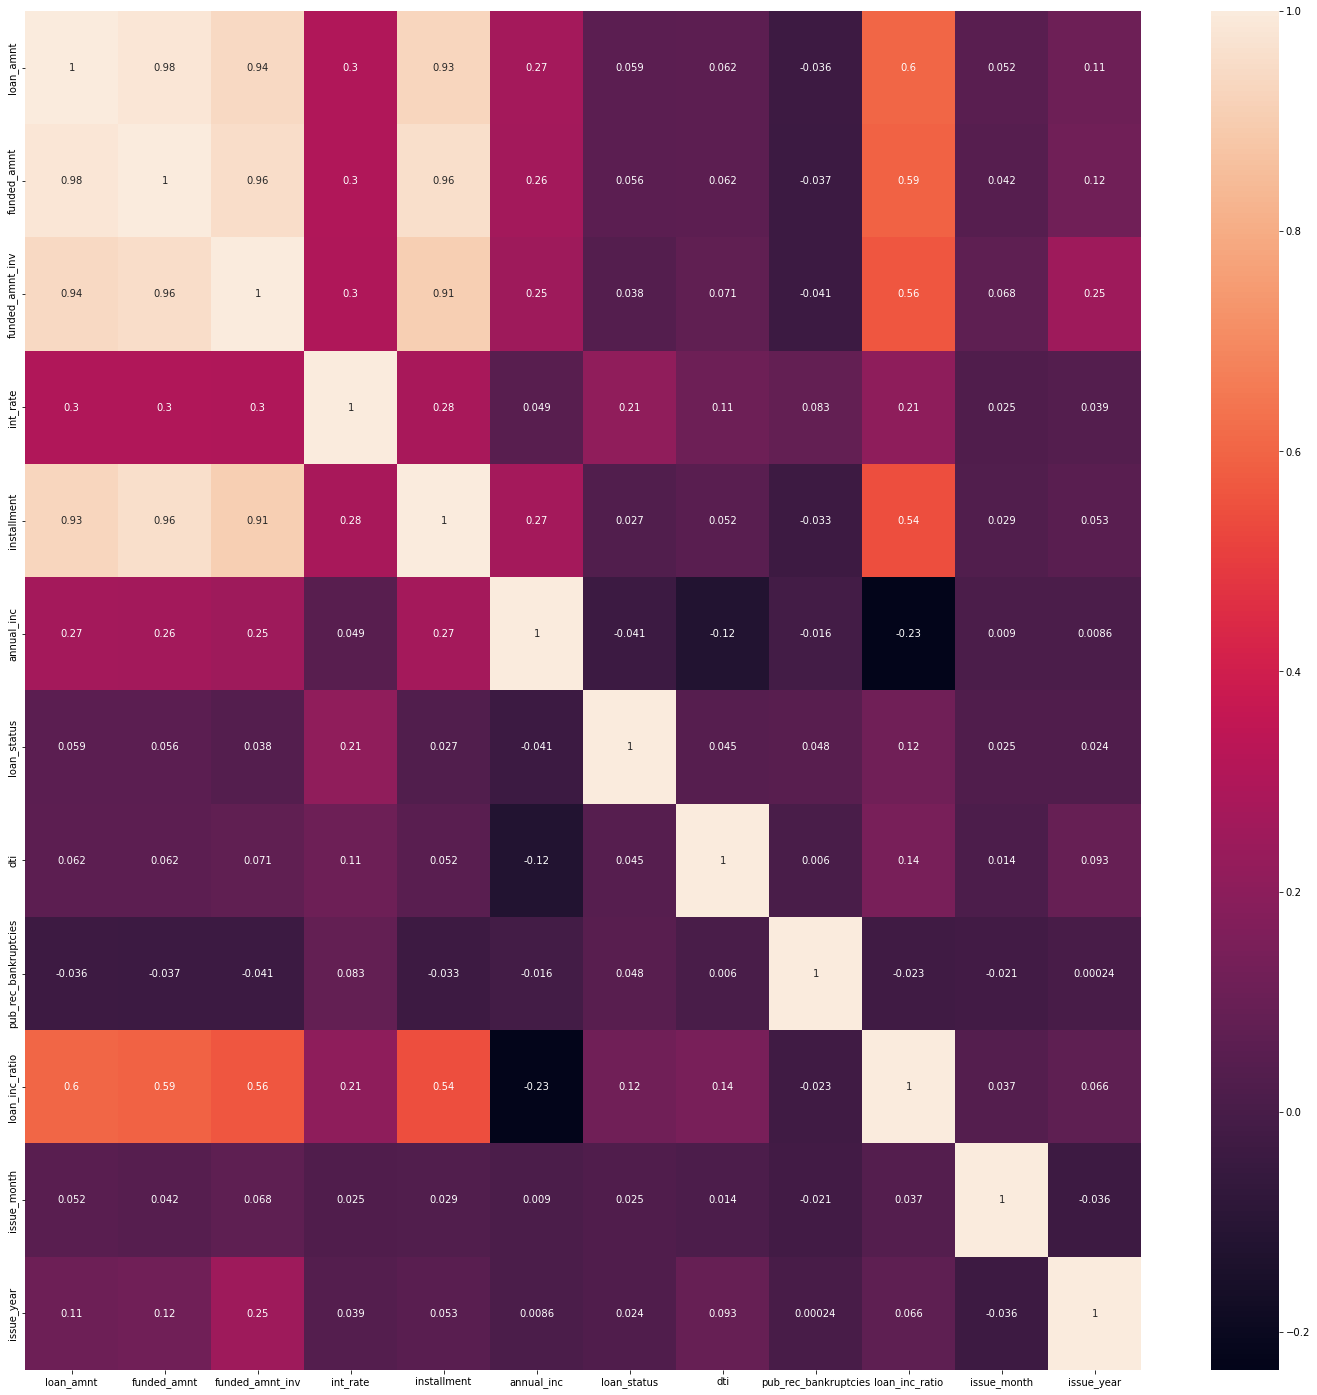

In [56]:
plt.figure(figsize=(25,25))
df = pd.DataFrame(loan)

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

 0bservations: From the Heatmap, the 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are  closely interrelated. 
              So we can take any one column out of them for our analysis.
 dti and annual_inc are negatively correlated. 

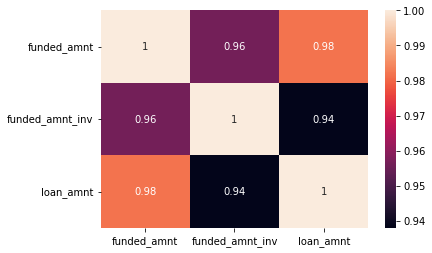

In [58]:
df = pd.DataFrame(loan,columns=['funded_amnt','funded_amnt_inv','loan_amnt'])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Observations: From the Heatmap, the 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are  closely interrelated. 

With increase in income 'dti' is decreasing. Thus  higher loan amount can be sanctioned.

#### Important variables for default are
• Grade

• interest rate

• Term

• Home Ownership

• Year